<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

<div >
<img src = "figs/Banner-Modernización-Tibitoc.jpg" />
</div>

<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; display: flex; align-items: center; justify-content: space-between; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <!-- Logo de la empresa en SVG con color blanco -->
  <img src="figs/Acueducto_Relieve_Vertical-logo-58E2699533-seeklogo.svg" alt="Logo Acueducto de Bogotá" style="width: 120px; height: auto; filter: invert(100%);">
  
  <!-- Texto del proyecto -->
  <div style="text-align: left; max-width: 75%;">
    <h2 style="font-size: 30px; font-weight: bold; margin: 0;">Proyecto Final Semana 3</h2>
    <hr style="border: 1px solid white; width: 50%; margin: 10px 0;">
    <p style="font-size: 18px; margin: 10px 0 0 0;">
      Determinación de Dosis Óptima de Coagulantes para PTAP Tibitoc mediante Algoritmos de Aprendizaje No Supervisado y Regresión Logística.
    </p>
  </div>
</div>


<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <p style="font-size: 18px; margin: 0;">
    En este proyecto, se aborda el problema de la identificación y clasificación de anomalías en el tratamiento del agua potable, utilizando datos provenientes de análisis fisicoquímicos realizados en las etapas de captación y tratamiento, particularmente en el proceso de coagulación para agua potable. El objetivo principal es mejorar la eficiencia del tratamiento del agua mediante la identificación de características fisicoquímicas clave que puedan optimizar los procesos de dosificación de productos químicos.
  </p>
</div>


<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <p style="font-size: 18px; margin: 0;">
    0. LIBRERIAS:Acontinuación actualizaremos las librerias necesarias
  </p>
</div>

In [57]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Evitar mensajes de advertencia innecesarios
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <p style="font-size: 18px; margin: 0;">
    1. DATOS:Acontinuación actualizaremos la lectura y limpieza de datos para asegurar que se manejen adecuadamente los valores faltantes y duplicados
  </p>
</div>

In [16]:
#  Obtención y limpieza de datos
#---------------------------------------------------------------
#Obtener el directorio de trabajo actual
current_dir = os.getcwd()

# Construir la ruta del archivo de datos usando el directorio actual
file_path = os.path.join(current_dir, "Data", "DATOS.xlsx")

# Leer los dataframes de las hojas 2023 y 2024 quitando la primera fila que contiene un título general
df_2023 = pd.read_excel(file_path, sheet_name="2023", skiprows=1)
df_2024 = pd.read_excel(file_path, sheet_name="2024", skiprows=1)

# Cambiar el nombre de la columna sin título por 'DÍA'
df_2023 = df_2023.rename(columns={"Unnamed: 0": "DÍA"})
df_2024 = df_2024.rename(columns={"Unnamed: 0": "DÍA"})

# Unir los dos dataframes en uno solo
df_total = pd.concat([df_2023, df_2024], ignore_index=True)

# Eliminar espacios en blanco al inicio o al final de los nombres de las columnas y convertirlos a mayúsculas para estandarizar
df_total.columns = df_total.columns.str.strip().str.upper()

# Reemplazar 'ND' por 0, considerando que ND son valores no detectados, equivalentes a cero
df_total.replace('ND', 0, inplace=True)

# Reemplazar valores 'X' y 'S' por NaN para luego imputarlos o eliminarlos según sea necesario
df_total.replace(['X', 'S'], pd.NA, inplace=True)


# Aplicamos la condición de negocio: Reemplazamos los valores faltantes identificados con 'X' en 'BN - MATERIA ORGANICA' con los valores de 'BN - COT'
df_total['MATERIA ORGANICA MG/L BN'].fillna(df_total['COT  MG/L  BN'], inplace=True)

# Convertir todas las columnas a numéricas donde sea posible
df_total = df_total.apply(pd.to_numeric, errors='coerce')

# Imputar valores faltantes con la media de cada columna (para todas las columnas que tienen NaN restantes)
df_total.fillna(df_total.mean(), inplace=True)

# Convertir la columna 'DÍA' a un formato de fecha estándar
df_total['DÍA'] = pd.to_datetime(df_total['DÍA'], errors='coerce')
df_total.drop(columns=['UNNAMED: 60'], inplace=True)


In [44]:
# Verificar el DataFrame final
#---------------------------------------------------------------
# Verificar los nombres de las columnas después de la limpieza
#print(df_total.columns)
#print("DataFrame final:")
#print(df_total.head())

In [18]:
df_total

,DÍA,TEMPERATURA ⁰C BN,OXIGENO DISUELTO MG/L O2 BN,TURBIEDAD UNT BN,COLOR UPC BN,CONDUCTIVIDAD US/CM BN,PH BN,MATERIA ORGANICA MG/L BN,NITROGENO AMONIACAL ΜG/L BN,MANGANESOS MG/L MN. BN,...,TEMPERATURA ⁰C MEZ,PH MEZ,CLORO LIBRE MG/L CL2 MEZ,CLORO COMBINADO MG/L CL2 MEZ,CLORO TOTAL MG/L CL2 MEZ,POTENCIAL REDOX MVMEZA,AL₂(SO)₄ PPM,AL₂(SO)₄ SOLIDO PPM,PAC PPM,FECL3 PPM
0,2023-08-01,16.2,3.79,28.90,327.0,93.0,6.98,6.816286,651.50,0.0720,...,17.1,6.38,0.29256,0.648889,0.94855,305,0.000000,18.000000,18.000000,0.000000
1,2023-08-02,16.5,3.77,39.90,447.0,94.0,6.92,8.953695,666.00,0.0694,...,17.1,5.84,0.29256,0.648889,0.94855,340,40.000000,18.000000,0.000000,0.000000
2,2023-08-03,16.0,4.70,143.00,1455.0,85.0,6.81,10.645355,541.03,0.0895,...,16.7,5.89,0.29256,0.648889,0.94855,340,36.000000,20.000000,0.000000,0.000000
3,2023-08-04,17.1,4.50,39.80,440.0,96.0,6.85,8.690196,481.00,0.0800,...,17.5,5.52,0.29256,0.648889,0.94855,335,52.000000,20.000000,0.000000,0.000000
4,2023-08-05,16.9,3.61,34.80,391.0,97.0,6.85,8.805583,602.00,0.0805,...,17.3,5.59,0.29256,0.648889,0.94855,345,38.000000,26.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2024-01-27,17.0,3.41,8.36,108.0,91.0,6.86,4.420846,540.00,0.0538,...,18.2,6.33,0.29256,0.648889,0.94855,325,45.583562,13.745205,11.194521,0.728767
513,2024-01-28,18.8,2.94,7.80,104.0,112.0,6.95,5.245393,710.50,0.0753,...,19.1,6.20,0.13000,0.650000,0.78000,380,45.583562,13.745205,11.194521,0.728767
514,2024-01-29,19.6,2.13,6.88,97.0,129.0,6.99,3.586473,769.00,0.0541,...,17.5,6.25,0.31000,0.540000,0.85000,430,45.583562,13.745205,11.194521,0.728767
515,2024-01-30,18.7,2.91,7.40,100.0,113.0,6.93,4.108108,816.88,0.0532,...,19.1,6.30,0.06000,0.510000,0.57000,380,45.583562,13.745205,11.194521,0.728767


In [19]:
# Contar el total de valores NaN en el DataFrame
total_na = df_total.isna().sum().sum()
print(f"Total de valores NaN en el DataFrame: {total_na}")


Total de valores NaN en el DataFrame: 0


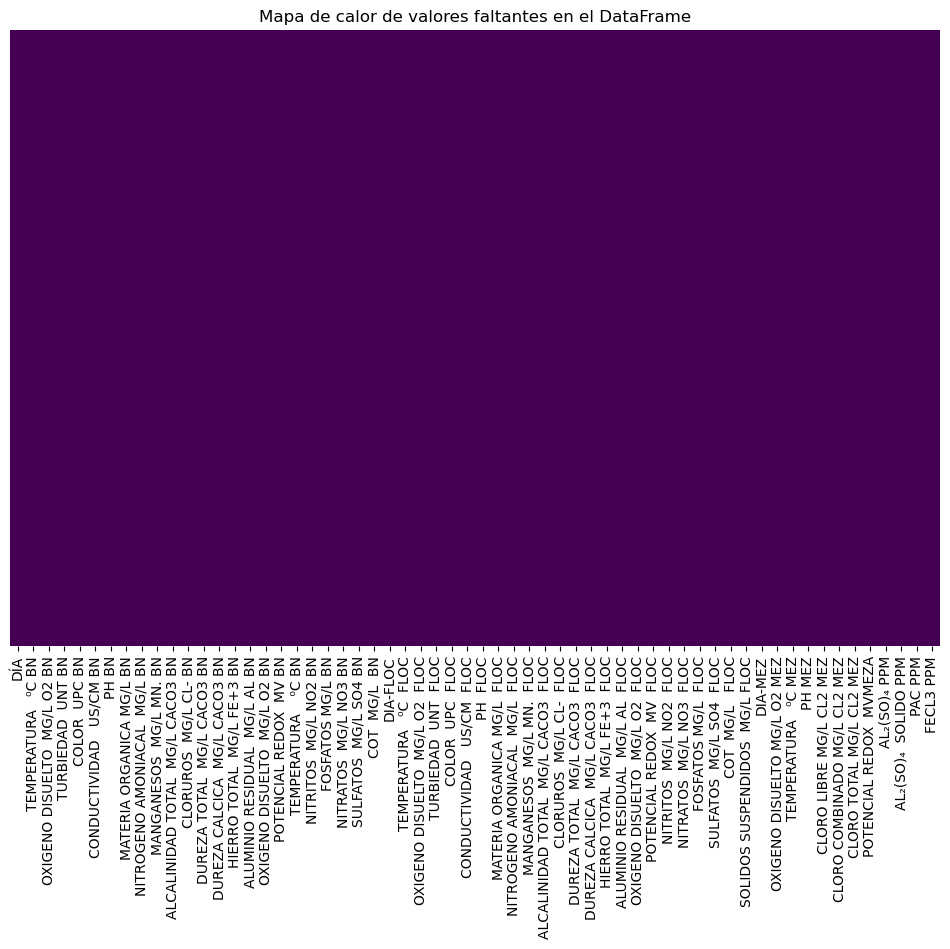

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización gráfica de valores faltantes en el DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(df_total.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Mapa de calor de valores faltantes en el DataFrame")
plt.show()

<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <p style="font-size: 18px; margin: 0;">
    2. ANÁLISIS ESTADISTICO:Acontinuación se realiza un análisis estadistico general de los datos
  </p>
</div>

In [75]:
# Obtenemos un resumen estadístico de las variables numéricas.
# Esto incluye la media, desviación estándar, valores mínimos y máximos, y los percentiles.
descripcion_general = df_total.describe()

# Mostramos la descripción general
descripcion_general

,DÍA,TEMPERATURA ⁰C BN,OXIGENO DISUELTO MG/L O2 BN,TURBIEDAD UNT BN,COLOR UPC BN,CONDUCTIVIDAD US/CM BN,PH BN,MATERIA ORGANICA MG/L BN,NITROGENO AMONIACAL ΜG/L BN,MANGANESOS MG/L MN. BN,...,TEMPERATURA ⁰C MEZ,PH MEZ,CLORO LIBRE MG/L CL2 MEZ,CLORO COMBINADO MG/L CL2 MEZ,CLORO TOTAL MG/L CL2 MEZ,POTENCIAL REDOX MVMEZA,AL₂(SO)₄ PPM,AL₂(SO)₄ SOLIDO PPM,PAC PPM,FECL3 PPM
count,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,2023-10-02 06:16:00.928433152,16.412578,3.008923,20.351260,234.630232,140.006364,13.052012,6.964056,1104.959273,38.260097,...,17.253617,6.173366,0.292560,0.648889,0.948550,411.388781,45.583562,13.745205,11.194521,0.728767
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,...,2.900000,5.110000,0.000000,-0.020000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000
25%,2023-05-09 00:00:00,16.100000,1.290000,8.030000,108.000000,117.000000,6.890000,5.296112,765.000000,0.067300,...,16.700000,6.040000,0.140000,0.520000,0.840000,355.000000,40.000000,0.000000,0.000000,0.000000
50%,2023-09-16 00:00:00,16.700000,2.190000,13.100000,171.000000,144.000000,6.970000,6.400000,1145.000000,0.083100,...,17.300000,6.190000,0.260000,0.648889,0.948550,410.000000,45.583562,13.745205,11.194521,0.000000
75%,2024-01-23 00:00:00,17.400000,3.060000,22.700000,272.000000,162.000000,7.040000,7.690783,1464.700000,0.121000,...,18.000000,6.340000,0.292560,0.830000,1.110000,440.000000,60.000000,20.000000,16.000000,0.728767
max,2024-08-31 00:00:00,29.000000,18.900000,255.000000,2236.000000,380.000000,165.000000,29.000000,2620.500000,1573.000000,...,165.000000,6.770000,1.180000,1.540000,1.830000,3352.000000,120.000000,64.000000,84.000000,20.000000
std,NaN,3.031993,3.794413,26.243119,247.081319,43.865318,26.813385,2.714237,508.202415,172.314128,...,6.903259,0.240608,0.232006,0.300833,0.302165,191.703405,25.165834,11.386387,14.428599,2.939357


In [87]:
descripcion_general.to_csv(file_path)
df_stats = pd.read_csv(file_path, index_col=0)


In [22]:
# Lista de variables importantes actualizada según los nombres de columnas exactos en el DataFrame
variables_importantes_captación = ['TEMPERATURA   ⁰C BN', 'OXIGENO DISUELTO  MG/L O2 BN',
       'TURBIEDAD  UNT BN', 'COLOR  UPC BN', 'CONDUCTIVIDAD   US/CM BN',
       'PH BN', 'MATERIA ORGANICA MG/L BN', 'NITROGENO AMONIACAL  ΜG/L BN',
       'MANGANESOS  MG/L MN. BN', 'ALCALINIDAD TOTAL  MG/L CACO3 BN',
       'CLORUROS  MG/L CL- BN', 'DUREZA TOTAL  MG/L CACO3 BN',
       'DUREZA CALCICA  MG/L CACO3 BN', 'HIERRO TOTAL  MG/L FE+3 BN',
       'ALUMINIO RESIDUAL  MG/L AL BN', 'OXIGENO DISUELTO  MG/L O2 BN',
       'POTENCIAL REDOX  MV BN', 'TEMPERATURA    ⁰C BN',
       'NITRITOS  MG/L NO2 BN', 'FOSFATOS MG/L BN', 'NITRATOS  MG/L NO3 BN',
        'SULFATOS  MG/L SO4 BN', 'COT  MG/L  BN']



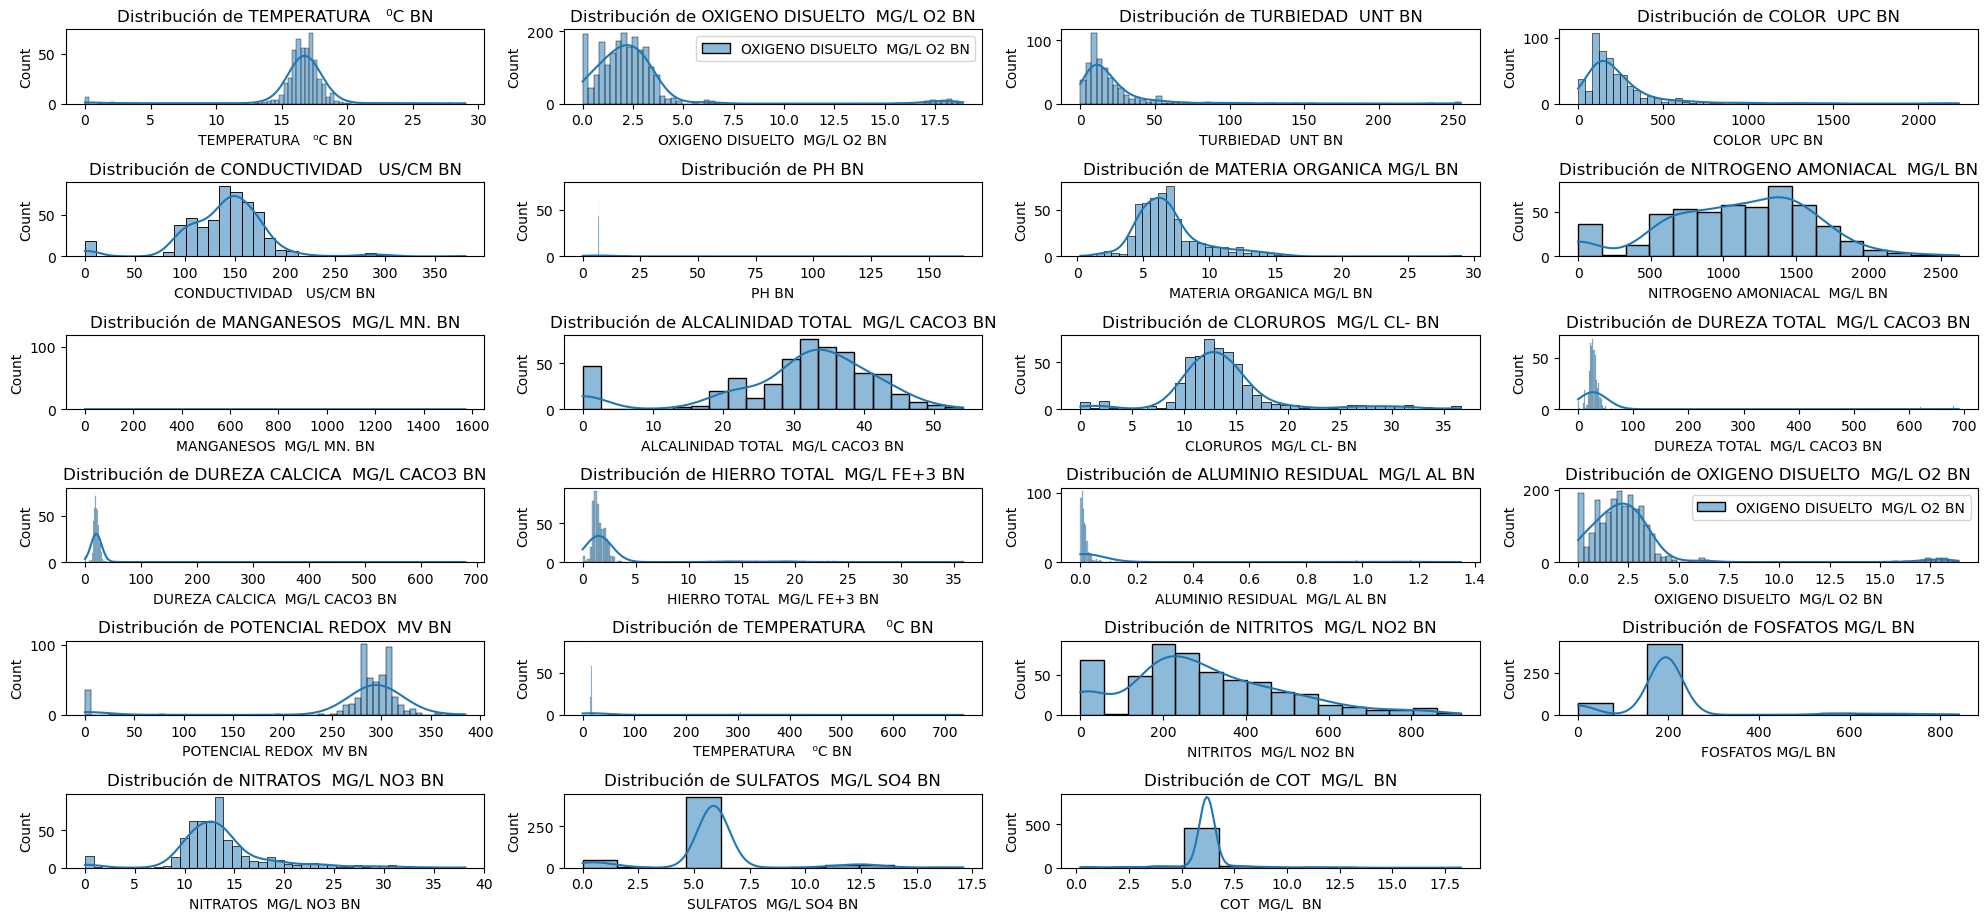

In [23]:
# Histograma y Gráfico de Densidad
plt.figure(figsize=(20, 15))
for i, column in enumerate(variables_importantes_captación, 1):
    plt.subplot(10, 4, i)
    sns.histplot(df_total[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()



In [34]:
# Eliminar columnas duplicadas
df_total = df_total.loc[:, ~df_total.columns.duplicated()]



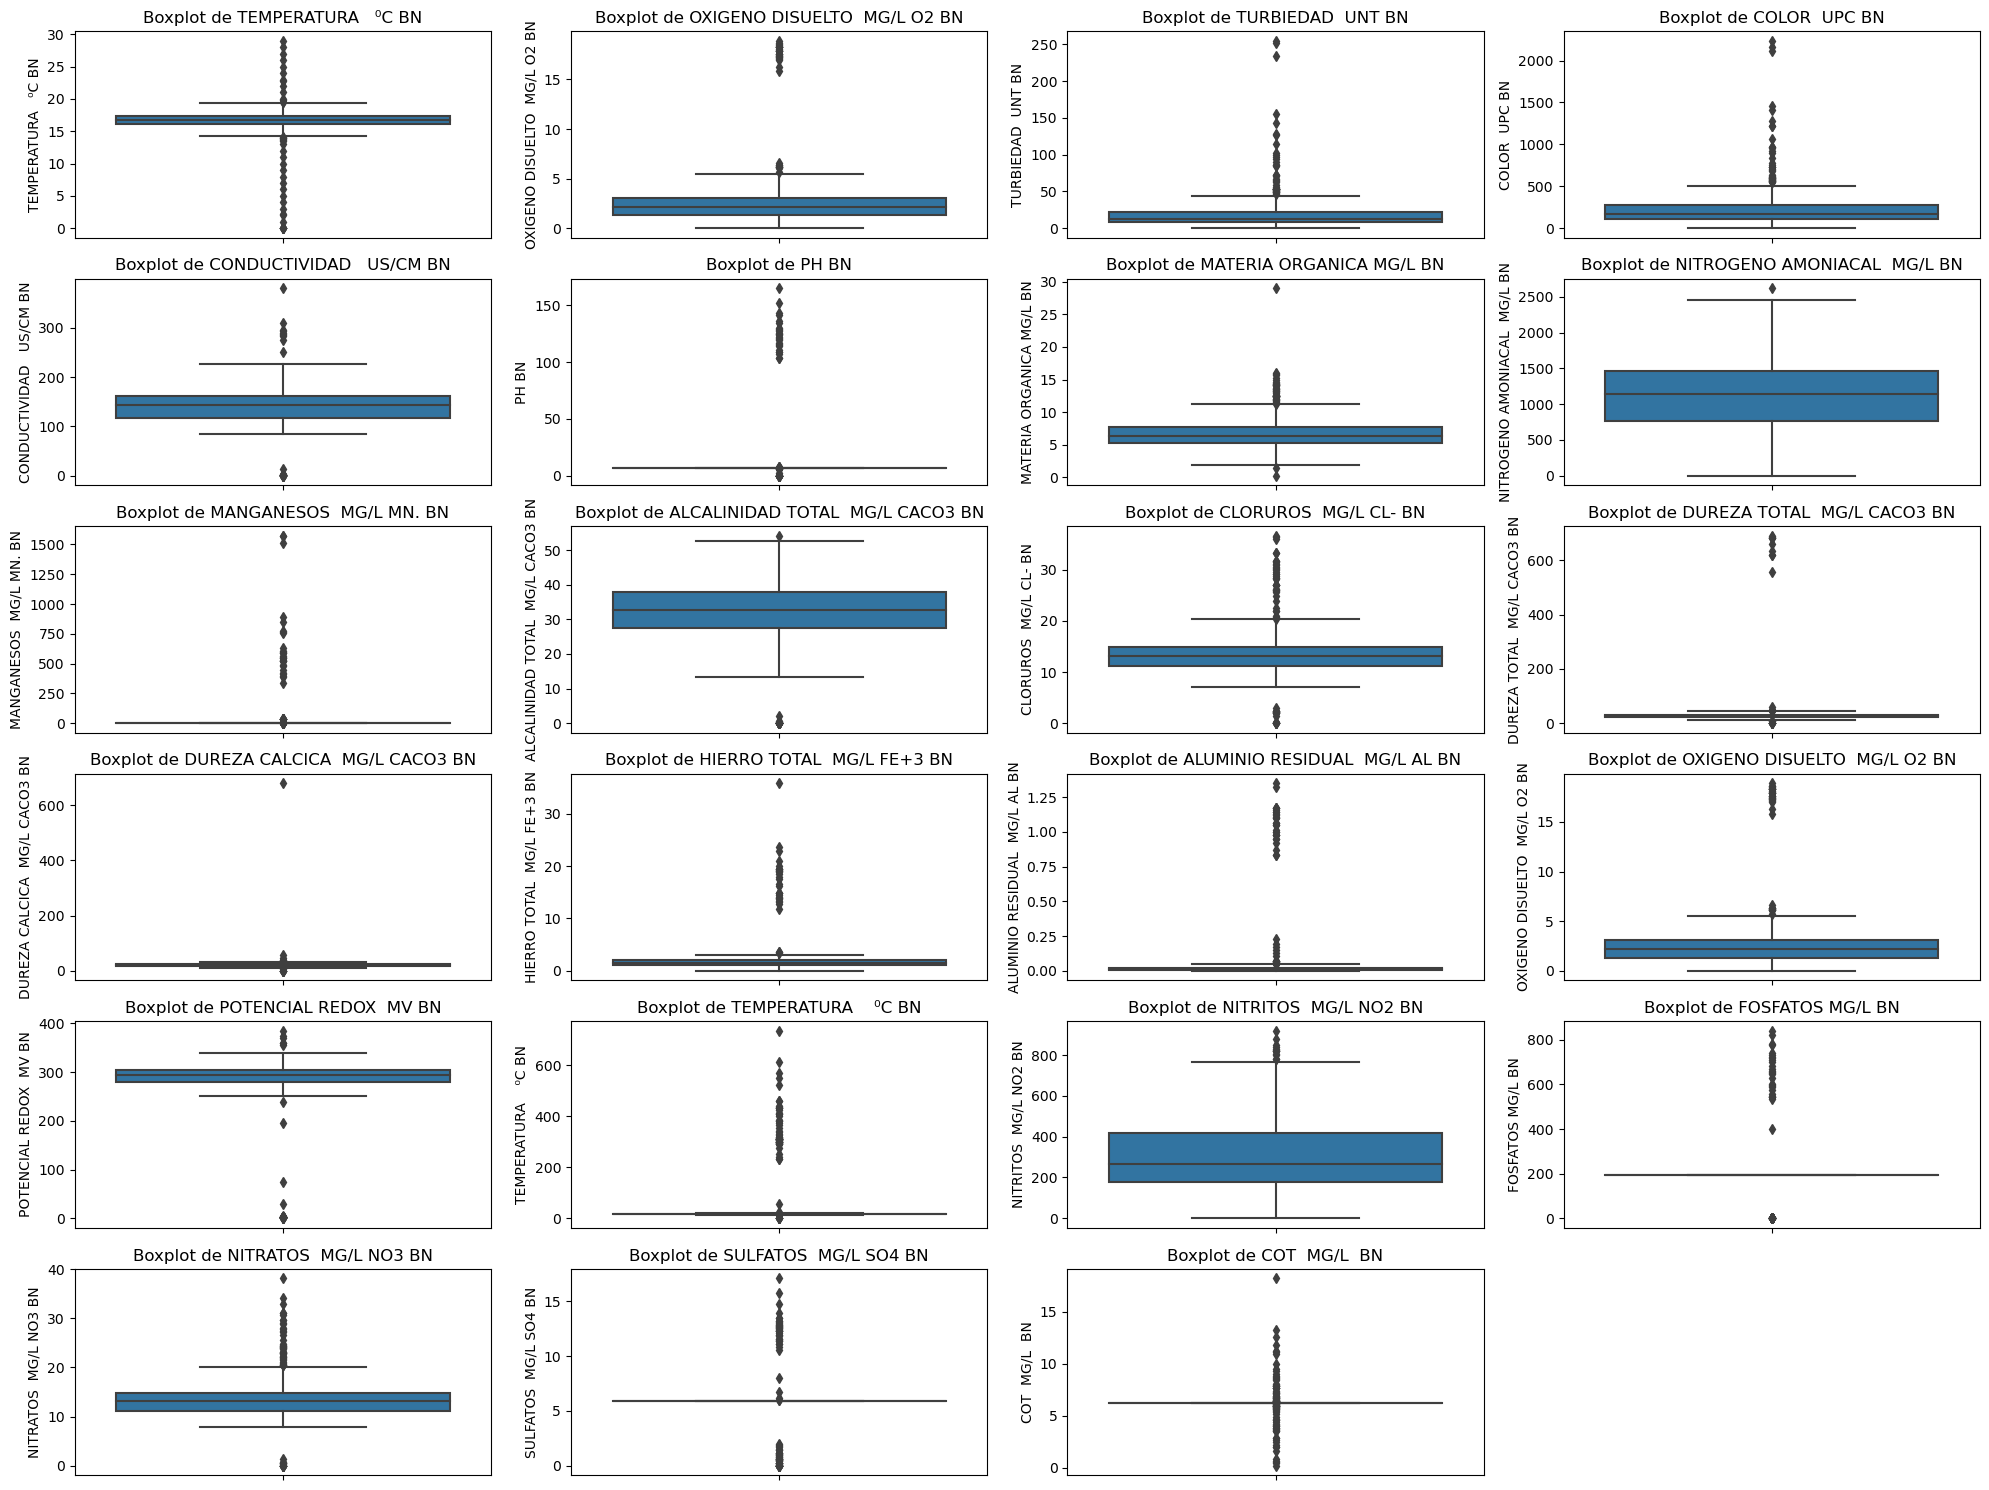

In [35]:
# Boxplots de las variables de captación
plt.figure(figsize=(20, 15))
for i, column in enumerate(variables_importantes_captación, 1):
    if column in df_total.columns:
        plt.subplot(6, 4, i)
        sns.boxplot(y=df_total[column])
        plt.title(f'Boxplot de {column}')
        plt.ylabel(column)
plt.tight_layout()
plt.show()

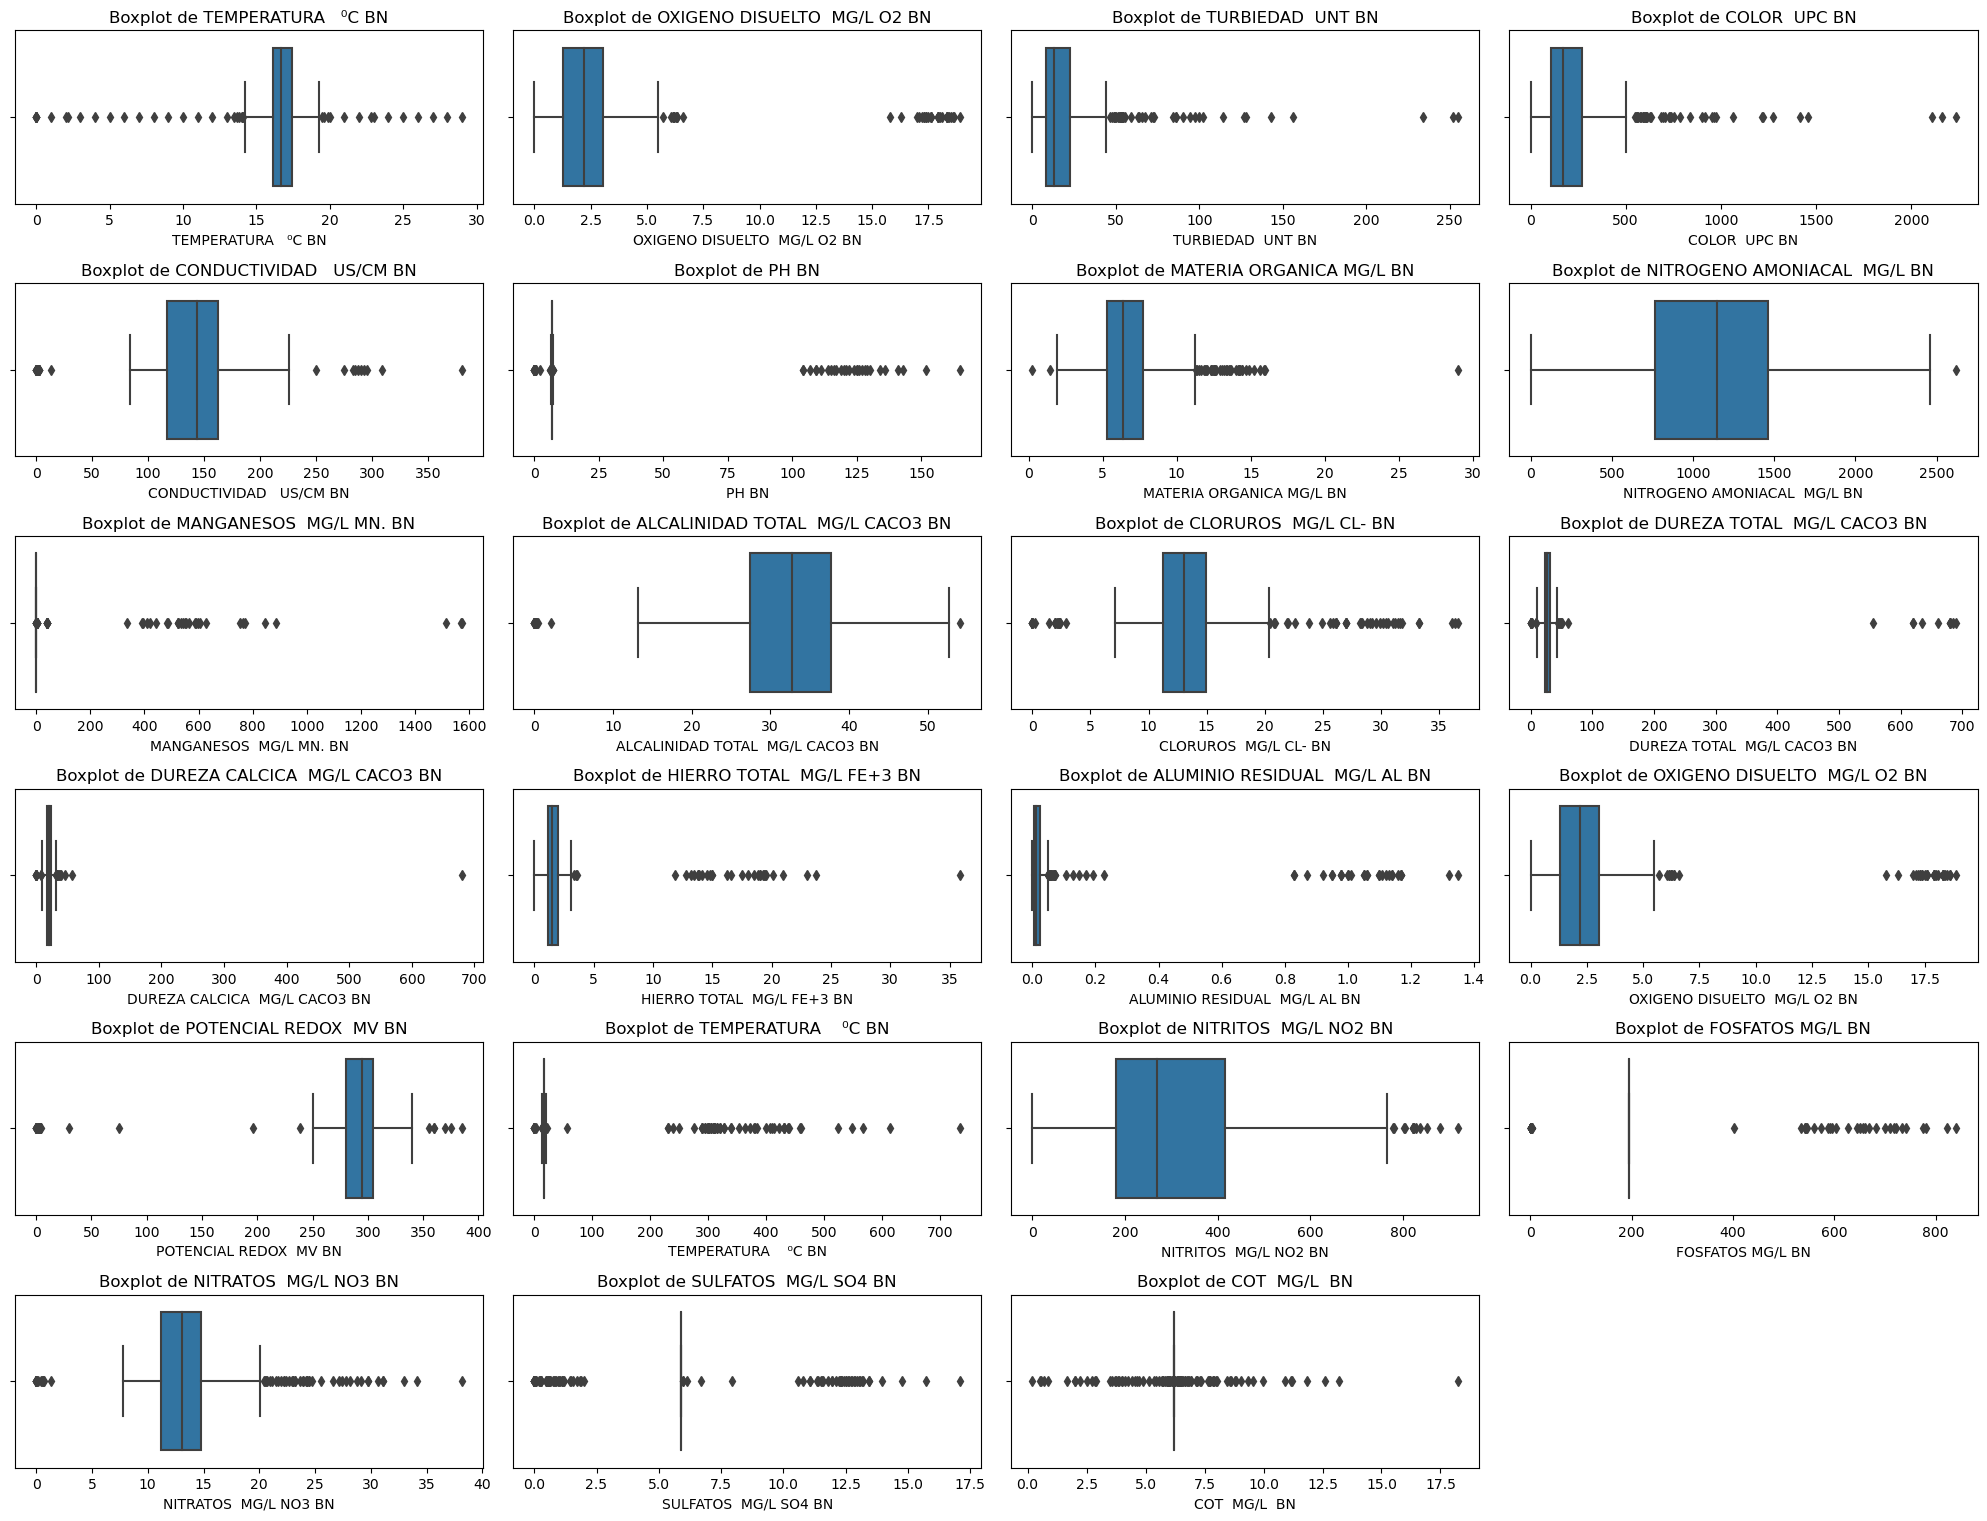

In [49]:
# Diagramas de Caja (Boxplots)
plt.figure(figsize=(20, 25))
for i, column in enumerate(variables_importantes_captación, 1):
    plt.subplot(10, 4, i)
    sns.boxplot(x=df_total[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()


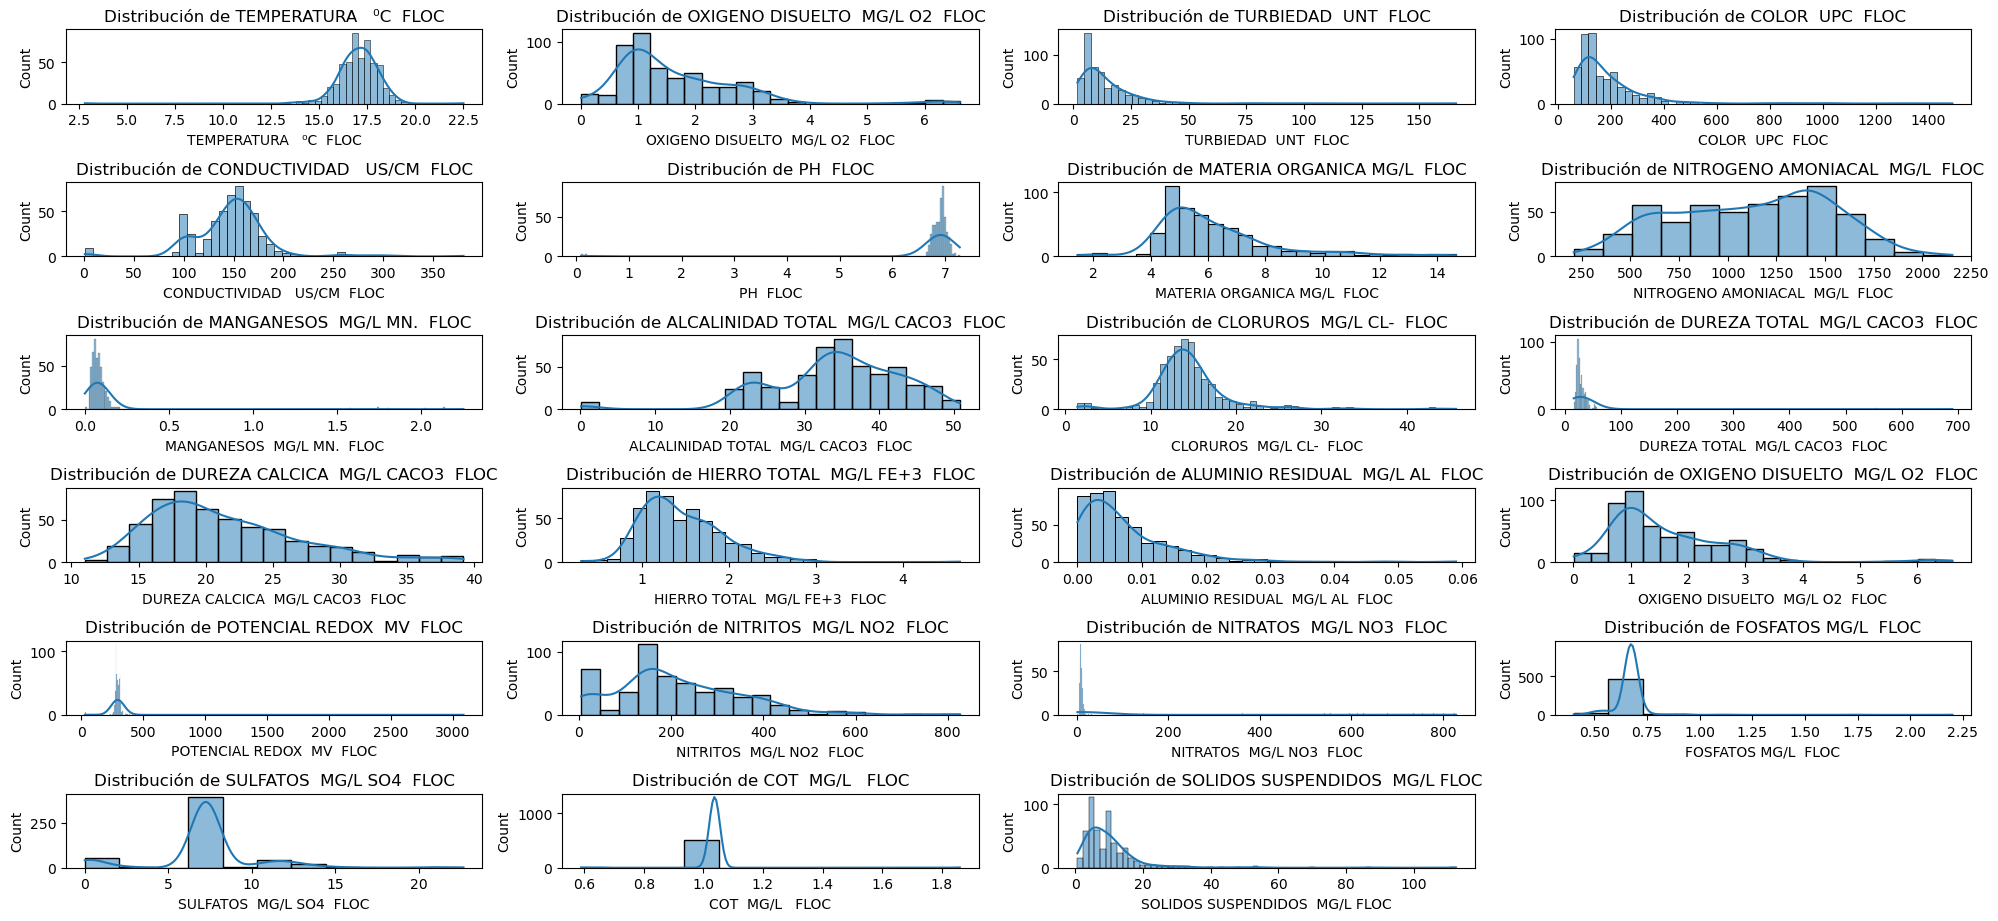

In [38]:

# Lista de variables importantes actualizada según los nombres de columnas exactos en el DataFrame
variables_importantes_cruda = ['TEMPERATURA   ⁰C  FLOC', 'OXIGENO DISUELTO  MG/L O2  FLOC',
       'TURBIEDAD  UNT  FLOC', 'COLOR  UPC  FLOC',
       'CONDUCTIVIDAD   US/CM  FLOC', 'PH  FLOC',
       'MATERIA ORGANICA MG/L  FLOC', 'NITROGENO AMONIACAL  ΜG/L  FLOC',
       'MANGANESOS  MG/L MN.  FLOC', 'ALCALINIDAD TOTAL  MG/L CACO3  FLOC',
       'CLORUROS  MG/L CL-  FLOC', 'DUREZA TOTAL  MG/L CACO3  FLOC',
       'DUREZA CALCICA  MG/L CACO3  FLOC', 'HIERRO TOTAL  MG/L FE+3  FLOC',
       'ALUMINIO RESIDUAL  MG/L AL  FLOC', 'OXIGENO DISUELTO  MG/L O2  FLOC',
       'POTENCIAL REDOX  MV  FLOC', 'NITRITOS  MG/L NO2  FLOC',
       'NITRATOS  MG/L NO3  FLOC', 'FOSFATOS MG/L  FLOC',
       'SULFATOS  MG/L SO4  FLOC', 'COT  MG/L   FLOC',
       'SOLIDOS SUSPENDIDOS  MG/L FLOC']

variables_importantes
# Histograma y Gráfico de Densidad
plt.figure(figsize=(20, 15))
for i, column in enumerate(variables_importantes_cruda, 1):
    plt.subplot(10, 4, i)
    sns.histplot(df_total[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


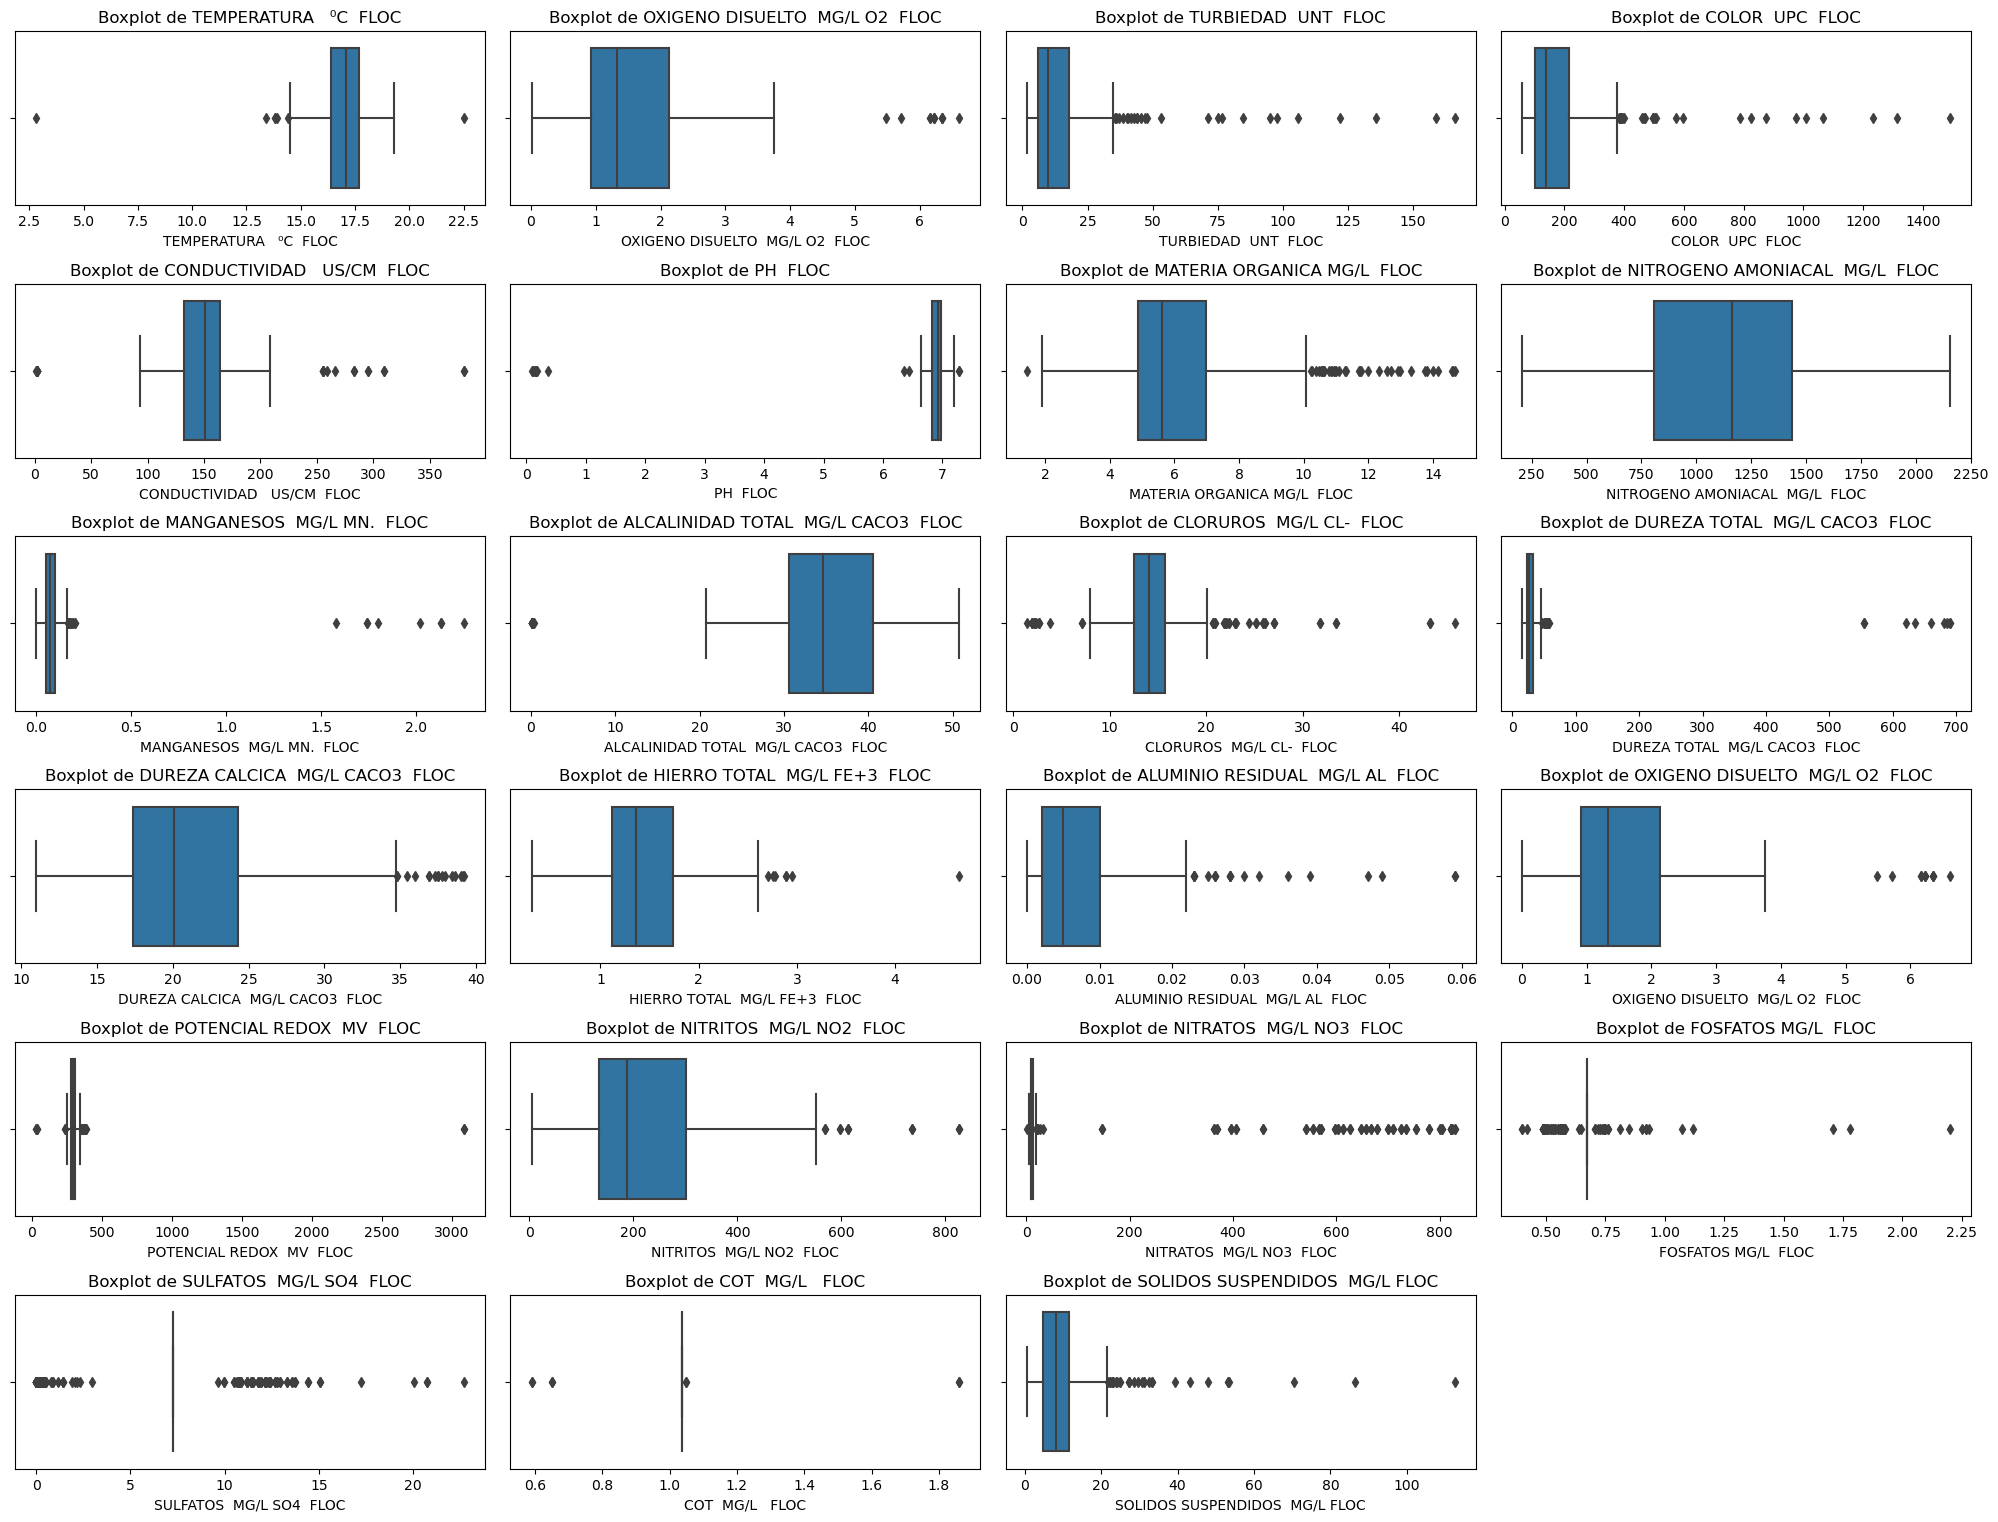

In [50]:
# Diagramas de Caja (Boxplots)
plt.figure(figsize=(20, 25))
for i, column in enumerate(variables_importantes_cruda, 1):
    plt.subplot(10, 4, i)
    sns.boxplot(x=df_total[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

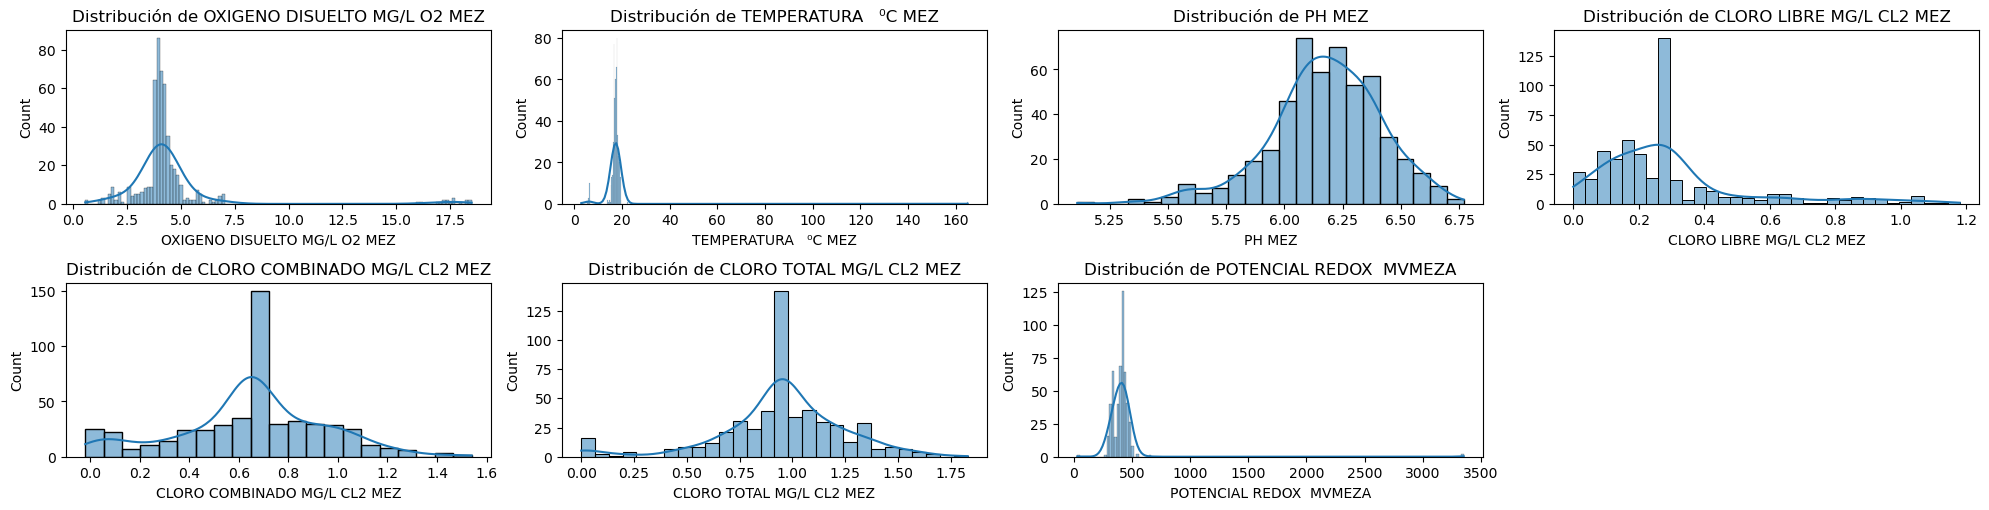

In [53]:

# Lista de variables importantes actualizada según los nombres de columnas exactos en el DataFrame
variables_importantes_mez = ['OXIGENO DISUELTO MG/L O2 MEZ', 'TEMPERATURA   ⁰C MEZ', 'PH MEZ',
       'CLORO LIBRE MG/L CL2 MEZ', 'CLORO COMBINADO MG/L CL2 MEZ',
       'CLORO TOTAL MG/L CL2 MEZ', 'POTENCIAL REDOX  MVMEZA']

variables_importantes
# Histograma y Gráfico de Densidad
plt.figure(figsize=(20, 25))
for i, column in enumerate(variables_importantes_mez, 1):
    plt.subplot(10, 4, i)
    sns.histplot(df_total[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


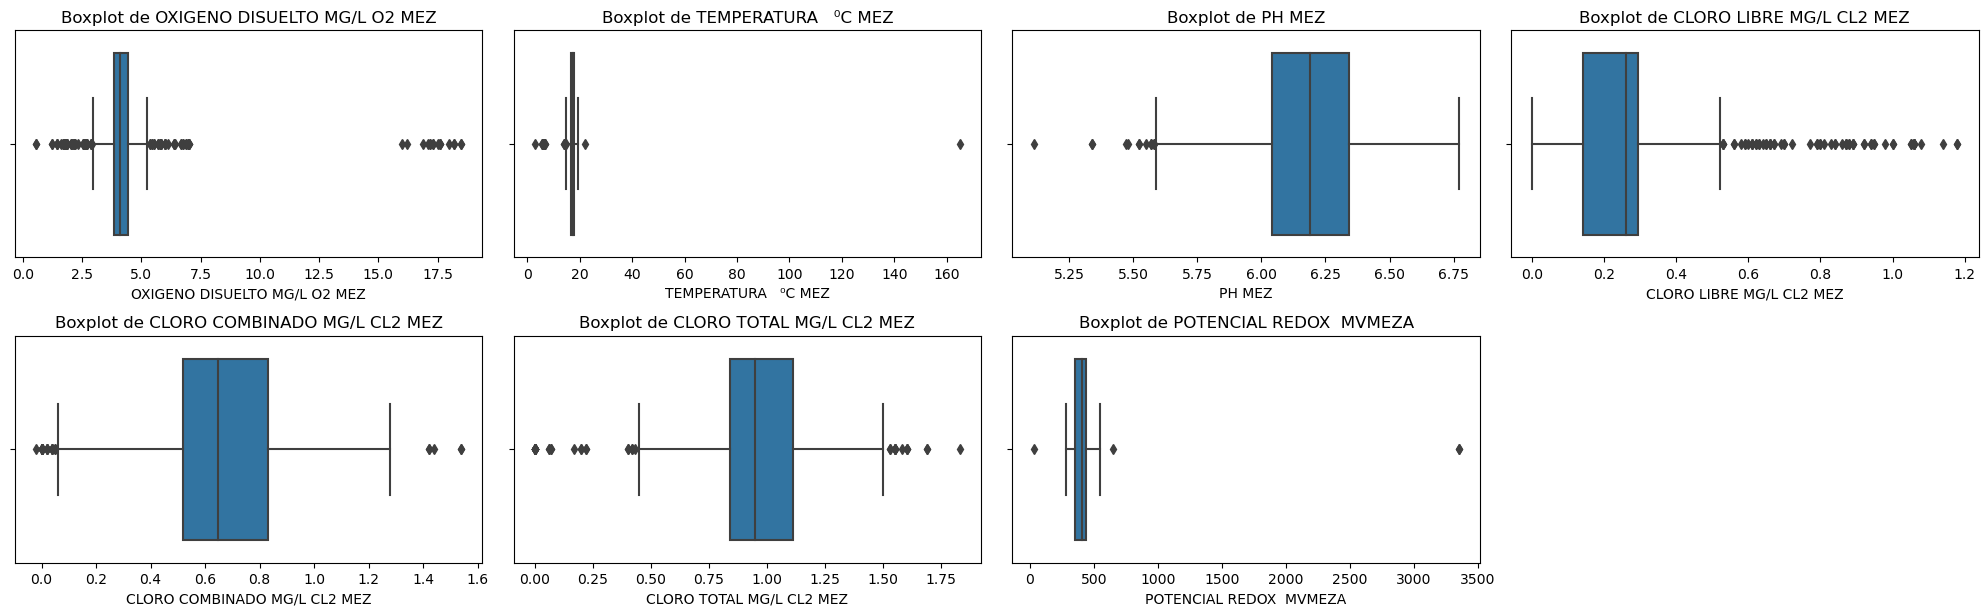

In [42]:
# Diagramas de Caja (Boxplots)
plt.figure(figsize=(20, 15))
for i, column in enumerate(variables_importantes_mez, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df_total[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

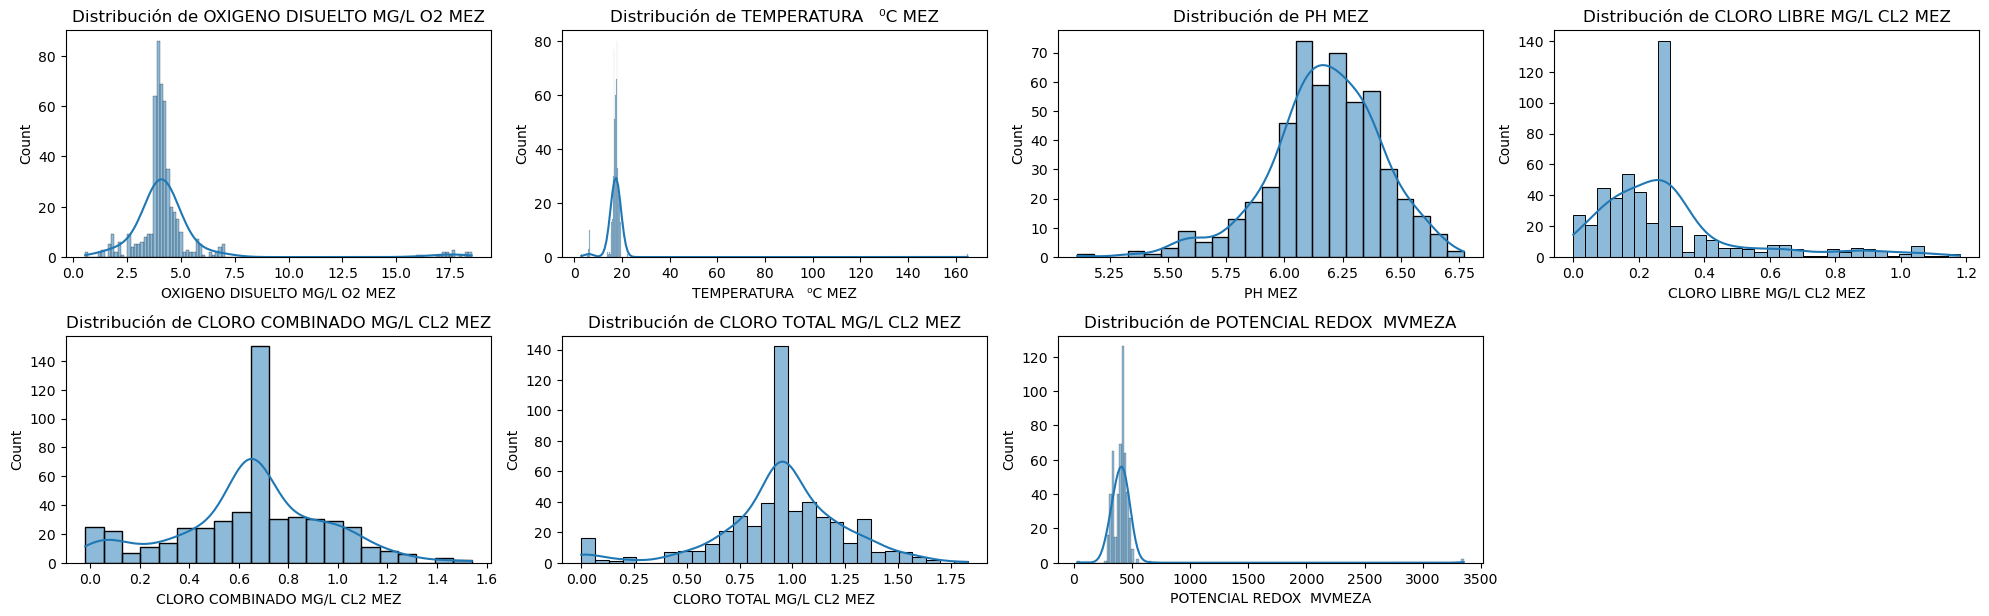

In [45]:

# Lista de variables importantes actualizada según los nombres de columnas exactos en el DataFrame
variables_importantes_dos = ['AL₂(SO)₄ PPM',
       'AL₂(SO)₄  SOLIDO PPM', 'PAC PPM', 'FECL3 PPM']

variables_importantes
# Histograma y Gráfico de Densidad
plt.figure(figsize=(20, 15))
for i, column in enumerate(variables_importantes_mez, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df_total[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

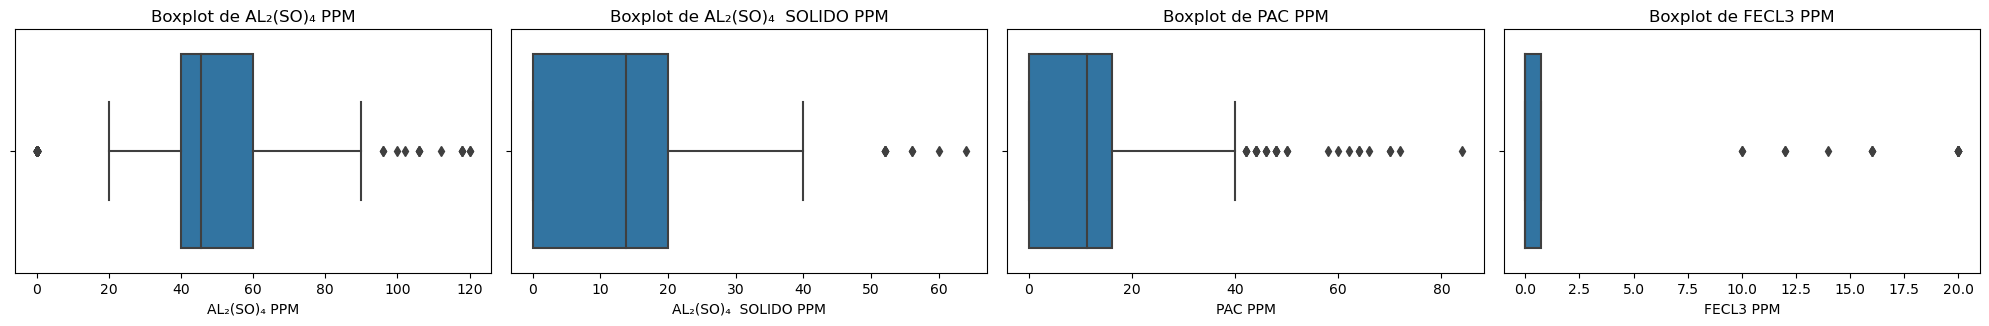

In [46]:
# Diagramas de Caja (Boxplots)
plt.figure(figsize=(20, 15))
for i, column in enumerate(variables_importantes_dos, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df_total[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [93]:
# Análsiis estadisticas por maximas
#--------------------------------------------------------------
df_stats = df_stats.drop(columns=['DÍA'])
df_stats_transposed = df_stats.T

umbral_max = df_stats_transposed.loc[:, 'max']
umbral_std = df_stats_transposed.loc[:, 'std']

# Detectar variables con valores máximos inusualmente altos
variables_con_valores_max_altos = umbral_max[umbral_max > umbral_max.median() + 2 * umbral_max.std()].index.tolist()

# Detectar variables con desviaciones estándar altas
variables_con_std_altas = umbral_std[umbral_std > umbral_std.median() + 2 * umbral_std.std()].index.tolist()


variables_interesantes = list(set(variables_con_valores_max_altos + variables_con_std_altas))
variables_interesantes_info = df_stats_transposed.loc[variables_interesantes]
variables_interesantes_info



,count,mean,min,25%,50%,75%,max,std
NITROGENO AMONIACAL ΜG/L FLOC,517.0,1124.445977,208.63,807.0,1162.0,1434.0,2153.7,399.722040
NITROGENO AMONIACAL ΜG/L BN,517.0,1104.959273,0.00,765.0,1145.0,1464.7,2620.5,508.202415
POTENCIAL REDOX MVMEZA,517.0,411.388781,29.00,355.0,410.0,440.0,3352.0,191.703405
POTENCIAL REDOX MV FLOC,517.0,304.620890,30.00,280.0,295.0,305.0,3085.0,176.010635
COLOR UPC BN,517.0,234.630232,0.00,108.0,171.0,272.0,2236.0,247.081319


<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <p style="font-size: 18px; margin: 0;">
    3. NORMALIZACIÓN:Acontinuación se realiza el procedimiento de normalización de datos, este proceso debe validarse en cuanto a resultados obtenidos despues de los modelos, debido a que hay cierta naturaleza en los datos que nos equitativa, es decir no todas las variables tienen el mismo peso, por tal motivo es necesario evalaur los modelos sin normalizar y con normalización de datos.
  </p>
</div>

In [66]:

# Para normalizar los datos a un rango de 0 a 1
scaler = MinMaxScaler()
df_normalized = df_total.copy()  # Crear una copia para no modificar el original
df_normalized[variables_importantes_captación] = scaler.fit_transform(df_total[variables_importantes_captación])

# Para estandarizar los datos (media = 0, desviación estándar = 1)
standard_scaler = StandardScaler()
df_standardized = df_total.copy()  # Crear una copia para no modificar el original
df_standardized[variables_importantes_captación] = standard_scaler.fit_transform(df_total[variables_importantes_captación])


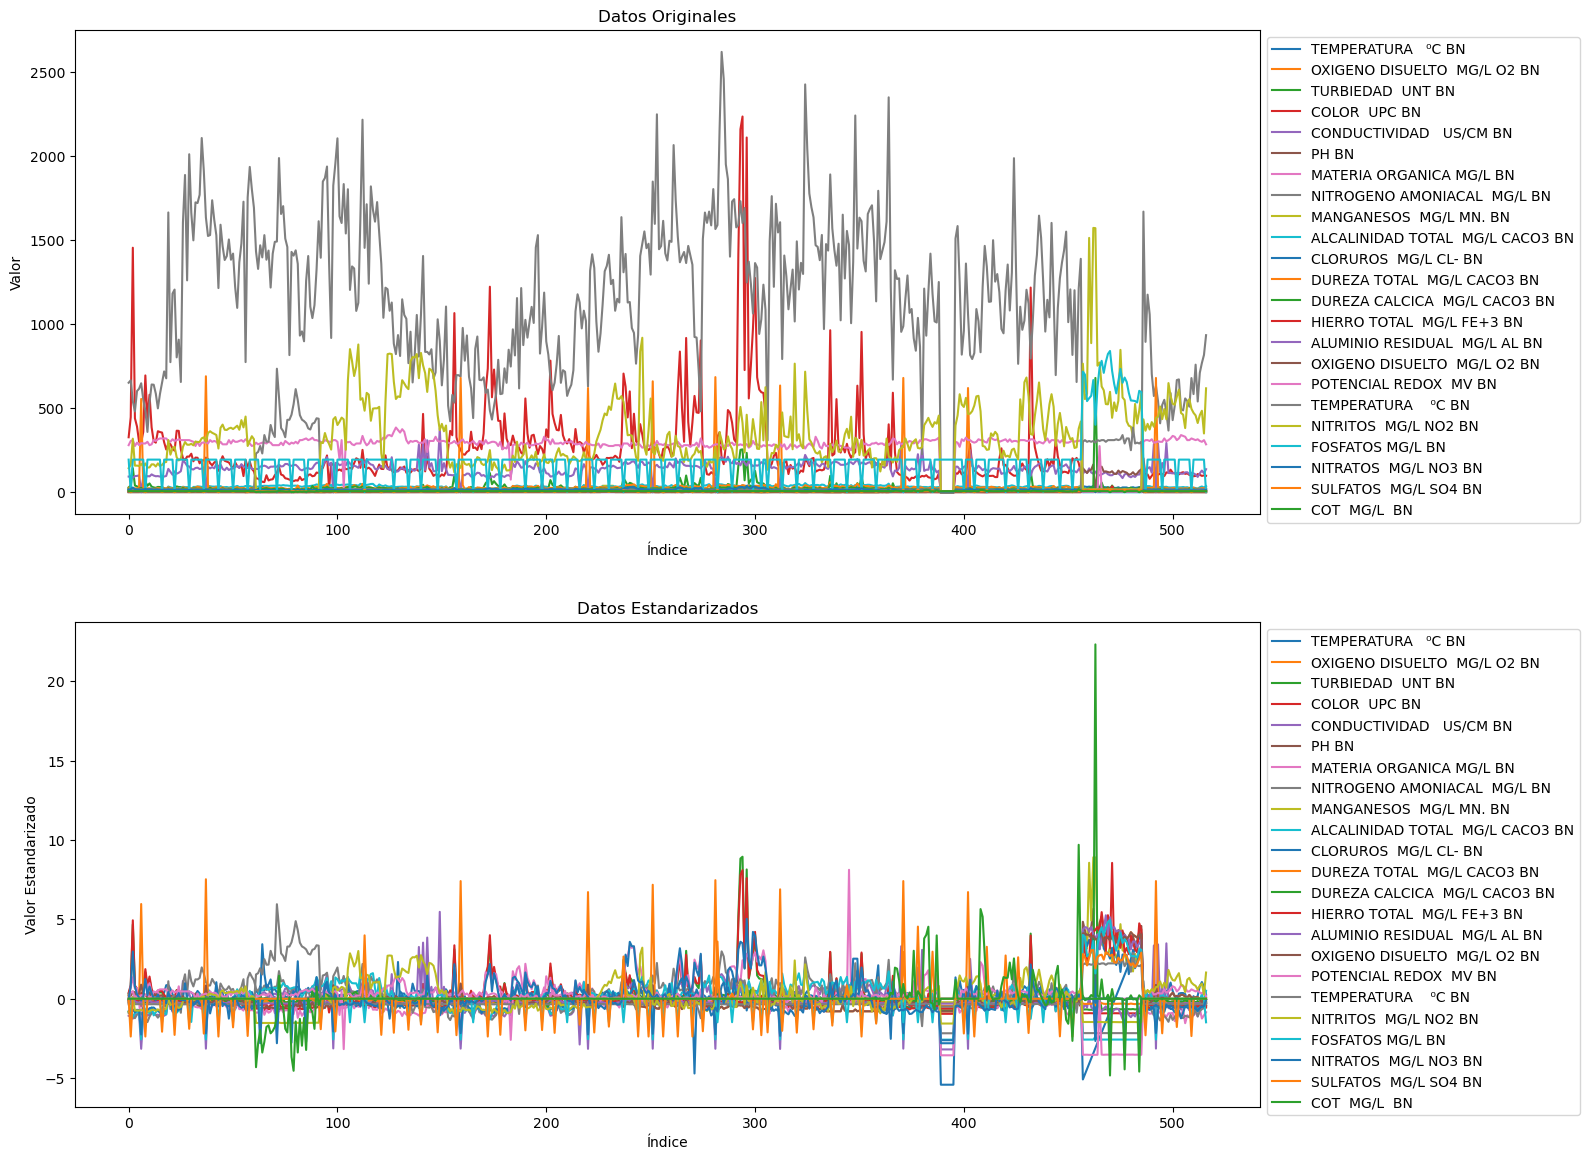

In [67]:
# Crear una gráfica de comparación para los datos originales y los datos estandarizados
plt.figure(figsize=(16, 12))

# Subplot datos originales
plt.subplot(2, 1, 1)
for column in variables_importantes_captación:
    plt.plot(df_total.index, df_total[column], label=column)
plt.title('Datos Originales')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Subplot datos estandarizados
plt.subplot(2, 1, 2)
for column in variables_importantes_captación:
    plt.plot(df_standardized.index, df_standardized[column], label=column)
plt.title('Datos Estandarizados')
plt.xlabel('Índice')
plt.ylabel('Valor Estandarizado')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


<div style="font-family: Arial, sans-serif; padding: 40px; background: linear-gradient(90deg, #1cc6d6, #2475db); border-radius: 10px; color: white; width: 100%; margin: auto; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
  <p style="font-size: 18px; margin: 0;">
    4. PCA:Acontinuación se realiza el procedimiento de reducción...
  </p>
</div>

#### Análisis variables

BN - Manganeso total: La distribución es bastante simétrica y parece tener una ligera concentración alrededor del valor 0.08 mg/L, hay algunas observaciones fuera de este rango, lo que sugiere posibles valores atípicos (outliers).

BN - Oxigeno disuelto: La distribución muestra una concentración alrededor de 2 mg/L, con algunos valores más dispersos que podrían indicar la presencia de outliers.

BN - Materia organica: La mayoría de los datos se concentran alrededor del valor 6 mg/L, pero también hay algunos valores extremos que podrían considerarse outliers.

Por otra parte, los boxplots confirman la presencia de valores atípicos en todas las variables. Las líneas extendidas en los boxplots sugieren que hay varios puntos fuera del rango intercuartílico, lo que indica la presencia de valores extremos o atípicos.

las variables BN - Manganeso total, BN - Oxigeno disuelto, y BN - Materia organica tienen distribuciones que parecen normales, pero con algunos outliers que podrían necesitar una revisión adicional.

In [ ]:
# Lista de variables importantes actualizada según los nombres de columnas exactos en el DataFrame
variables_importantes = ['BN -  TURBIEDAD', 'BN-  PH', 'BN- ALCALINIDAD',
       'BN - CONDUCTIVIDAD', 'BN - MANGANESO TOTAL', 'BN- TEMPERATURA',
       'BN - OXIGENO DISUELTO', 'BN - HIERRO TOTAL', 'BN - MATERIA ORGANICA',
       'BN - AMONIO', 'BN - NITRATOS', 'BN - NITRITOS', 'BN- ALUMINIO',
       'BN - DUREZA TOTAL', 'BN - DUREZA CÁLCICA', 'BN - CLORUROS',
       'BN - SULFATOS', 'BN - COLOR APARENTE', 'BN -FOSFATOS', 'BN - COT']

# Iteramos sobre cada columna numérica en el DataFrame
for column in df_total[variables_importantes].select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    # Generamos un histograma para visualizar la distribución de la variable
    sns.histplot(df_total[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


* Distribución de BN - Turbiedad:

Análisis: La distribución muestra que la mayoría de los valores de turbiedad se concentran en los valores más bajos, específicamente entre 0 y 20 NTU (Unidades Nefelométricas de Turbiedad). Hay una fuerte asimetría a la derecha, lo que indica que la mayoría de los datos están hacia el extremo inferior, con algunos valores atípicos más altos.

Interpretación: Esto podría indicar que en general, el agua tiene baja turbiedad, pero existen algunas mediciones con niveles significativamente más altos, lo que podría ser indicativo de episodios específicos de contaminación o condiciones ambientales inusuales.


* Distribución de BN - pH:

Análisis: La distribución del pH es más simétrica y se centra alrededor de 7.0, lo cual es cercano al pH neutro. La mayoría de las observaciones caen en un rango entre 6.8 y 7.2.

Interpretación: El pH del agua parece ser bastante estable y cerca del neutro, lo que es típico para muchas fuentes de agua natural. Esto sugiere que no hay eventos extremos de acidez o alcalinidad en el cuerpo de agua analizado.


* Distribución de BN - Alcalinidad:

Análisis: La distribución es aproximadamente simétrica con una ligera asimetría hacia la derecha, centrada alrededor de 30 mg/L.

Interpretación: La alcalinidad del agua es moderada, lo cual es adecuado para la mayoría de los cuerpos de agua, ya que ayuda a mantener el pH estable. Sin embargo, hay variabilidad que puede ser reflejo de diferentes influencias geológicas o antropogénicas.


* Distribución de BN - Conductividad:

Análisis: La distribución de la conductividad es asimétrica hacia la derecha, con un pico en torno a 150 µS/cm. Hay un número pequeño de mediciones con valores significativamente más altos.

Interpretación: Una conductividad predominantemente baja indica baja salinidad y la presencia de pocas sustancias disueltas en el agua. Los valores más altos pueden indicar fuentes puntuales de contaminación o la influencia de aguas subterráneas con alta mineralización.


* Distribución de BN - Temperatura:

Análisis: La distribución de la temperatura es ligeramente asimétrica hacia la izquierda, centrada en torno a 17-18°C, con una pequeña dispersión.

Interpretación: La temperatura del agua se mantiene relativamente estable, lo que es típico de aguas subterráneas o cuerpos de agua bien mezclados. Los pocos valores más bajos o más altos podrían ser influencias estacionales o medidas tomadas en diferentes horas del día.


* Distribución de BN - Hierro total:

Análisis: La distribución es asimétrica a la derecha, con la mayoría de las observaciones concentradas alrededor de 1 mg/L.

Interpretación: El hierro total presente en el agua parece estar en niveles moderados, pero hay algunas muestras con niveles más altos, lo cual puede ser indicativo de fuentes naturales como la erosión de rocas o posibles contaminantes industriales.


* Distribución de BN - Amonio:

Análisis: La distribución del amonio muestra una asimetría hacia la derecha con múltiples picos, lo que sugiere varias fuentes o eventos que han contribuido a los niveles observados.

Interpretación: El nivel de amonio en el agua es variable, con algunos valores que indican posibles eventos de contaminación por materia orgánica o influencias de actividades agrícolas. Los valores más altos pueden ser preocupantes, ya que niveles elevados de amonio pueden ser tóxicos para la vida acuática.

In [ ]:
df_total

## Análisis de Correlación entre Variables Numéricas:

In [ ]:
# Seleccionamos solo las columnas numéricas del DataFrame
df_numericas = df_total.select_dtypes(include=['float64', 'int64'])

# Calculamos la matriz de correlación entre las variables numéricas
correlacion = df_numericas.corr()

# Filtramos las correlaciones que sean mayores a un umbral absoluto, para este caso 0.7
umbral = 0.7
correlacion_significativa = correlacion[(correlacion > umbral) | (correlacion < -umbral)]


In [ ]:
# Aseguramos que la matriz de correlación no tenga valores NaN
corr_signif = correlacion_significativa.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Creamos una máscara para los valores que no son significativos (donde hay NaN)
mask = np.isnan(corr_signif)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_signif, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlación'})
plt.title('Mapa de Calor de Correlaciones Significativas')
plt.show()

In [ ]:
# Filtramos las correlaciones que sean mayores al umbral absoluto, excluyendo la diagonal (correlaciones de una variable consigo misma)
correlacion_significativa = correlacion[(correlacion.abs() > umbral) & (correlacion != 1.0)]

# Convertimos la matriz de correlación en un DataFrame de pares de variables, usando stack para evitar problemas con duplicados
corr_pairs = correlacion_significativa.stack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Coeficiente de Correlación']

# Filtramos las correlaciones duplicadas (Variable 1 y Variable 2 intercambiadas)
corr_pairs['abs_corr'] = corr_pairs['Coeficiente de Correlación'].abs()
corr_pairs = corr_pairs.loc[corr_pairs['Variable 1'] < corr_pairs['Variable 2']]

# Ordenamos por la magnitud del coeficiente de correlación
corr_pairs = corr_pairs.sort_values(by='abs_corr', ascending=False).drop(columns='abs_corr')

In [ ]:
corr_pairs

* Correlaciones Fuertes:

BN - Dureza Total y BN - Dureza Cálcica: Existe una correlación positiva fuerte cercana a 1.0. Esto es esperado, ya que la dureza total suele estar relacionada con la dureza cálcica, dado que ambos miden aspectos similares de la composición mineral del agua.

BN - Alcalinidad y BN - Conductividad: También muestran una correlación positiva significativa, lo cual es lógico, ya que ambos parámetros están relacionados con la presencia de minerales disueltos en el agua.


* Correlaciones Negativas:

BN - Nitratos y Oxígeno Disuelto: Hay una correlación negativa moderada, lo cual puede indicar que a medida que aumenta la concentración de nitratos, el oxígeno disuelto tiende a disminuir, posiblemente debido a procesos de eutrofización.

BN - Turbiedad y Oxígeno Disuelto: Aunque la correlación es más débil, también hay una relación negativa, lo que podría sugerir que aguas más turbias tienden a tener menores niveles de oxígeno disuelto, probablemente debido a la materia orgánica en suspensión que consume oxígeno.


* Correlaciones Moderadas:

BN - Color Aparente y Turbiedad: Se observa una correlación positiva moderada, lo cual es esperable, ya que aguas más turbias suelen tener un color aparente más intenso.

BN - Hierro Total y Conductividad: Existe una correlación positiva moderada, lo cual tiene sentido, ya que el hierro disuelto contribuirá a la conductividad del agua.


* Correlaciones Débiles o Inexistentes:

Muchas de las variables, como la temperatura, no muestran correlaciones fuertes con otras variables en el análisis. Esto puede indicar que la temperatura es un factor relativamente independiente de los otros parámetros medidos en este contexto.


## Boxplots (Diagramas de Caja) para Identificar Outliers:

In [ ]:
# Creamos un boxplot para cada variable numérica
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_total[variables_importantes], palette="Set2")
plt.title('Boxplot de Variables Numéricas')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

* BN - Turbiedad:

Análisis: La caja es bastante pequeña y cercana a cero, con algunos valores atípicos identificados por puntos fuera de los bigotes.

Interpretación: La mayoría de los valores de turbiedad están concentrados en un rango muy bajo, lo que es consistente con lo que observaste en el histograma anterior. Los outliers pueden indicar episodios donde la turbiedad fue significativamente mayor de lo normal.


* BN - pH:

Análisis: El boxplot es muy pequeño, casi sin variación, lo que indica que la mayoría de los datos están muy concentrados alrededor de la mediana.

Interpretación: Esto confirma que el pH es estable y se mantiene cerca de un valor central, con muy poca dispersión y casi sin valores atípicos, lo cual es común en sistemas bien regulados.


* BN - Alcalinidad:

Análisis: El boxplot muestra una mayor variabilidad en comparación con pH y turbiedad, pero sigue siendo relativamente pequeño. Hay algunos outliers presentes.

Interpretación: La alcalinidad tiene una distribución ligeramente más amplia, pero la mayoría de los valores siguen siendo relativamente bajos. Los outliers podrían ser resultado de condiciones puntuales que afectaron la alcalinidad del agua.


* BN - Conductividad:

Análisis: La caja es algo más grande, indicando una mayor variabilidad en los datos, y hay varios outliers significativos.

Interpretación: La conductividad tiene una mayor dispersión, lo que puede sugerir variabilidad en las sales disueltas o en la salinidad del agua. Los outliers pueden ser causados por influencias externas, como contaminación por sales o la presencia de aguas con alta mineralización.


* BN - Temperatura:

Análisis: El boxplot de la temperatura muestra poca variabilidad, con un par de outliers.

Interpretación: La temperatura del agua se mantiene relativamente constante, con pocos valores fuera de lo esperado, lo que es típico de aguas superficiales o subterráneas en condiciones estables.


* BN - Hierro total:

Análisis: Al igual que la temperatura, muestra una distribución compacta con algunos outliers.

Interpretación: El hierro total tiene una distribución que indica que la mayoría de los valores están concentrados en un rango específico, con algunos valores atípicos que podrían ser indicativos de contaminación o fuentes naturales de hierro en ciertas zonas.


* BN - Amonio:

Análisis: El boxplot de amonio es significativamente más grande en comparación con las otras variables, lo que indica una gran dispersión en los datos. No se observan outliers destacados, pero la variabilidad interna es alta.

Interpretación: La alta dispersión del amonio sugiere que esta variable tiene una gran variabilidad en su concentración, lo que puede estar relacionado con actividades antropogénicas o variaciones naturales en la calidad del agua. El rango intercuartil ancho sugiere que los niveles de amonio son altamente inconsistentes, lo cual puede ser motivo de preocupación en términos de calidad del agua.

## Pairplot para Visualización de Relaciones Múltiples

In [ ]:
# Convertimos valores infinitos a NaN en el subconjunto de variables numéricas
subset = df_numericas.iloc[:, :5].replace([np.inf, -np.inf], np.nan)

# Creamos un pairplot para el subconjunto de variables numéricas, ignorando NaN
sns.pairplot(subset, diag_kind='kde')
plt.suptitle('Pairplot de Subconjunto de Variables Numéricas', y=1.02)
plt.show()

1. Distribuciones en los histogramas diagonales:
   
- BN - Turbiedad: La distribución es fuertemente asimétrica hacia la derecha, lo que ya se había observado en los análisis anteriores. Esto sugiere que la mayoría de los valores están concentrados en el extremo inferior.
- BN - pH: El pH tiene una distribución muy concentrada alrededor de un valor central, cercano a 7.0, mostrando poca variabilidad.
- BN - Alcalinidad: La alcalinidad muestra una distribución con ligera asimetría, con un pico alrededor de 30 mg/L.
- BN - Conductividad: La conductividad presenta una distribución con asimetría hacia la derecha, similar a la turbiedad.
- BN - Temperatura: La temperatura tiene una distribución con ligera asimetría, concentrada entre 16°C y 18°C.

2. Relaciones entre variables (gráficos fuera de la diagonal):

* BN - Alcalinidad vs BN - pH:

Existe una correlación positiva moderada, lo que indica que a medida que aumenta la alcalinidad, el pH también tiende a aumentar. Esto podría estar relacionado con la capacidad de la alcalinidad para estabilizar el pH en cuerpos de agua.
BN - Conductividad vs BN - Alcalinidad:

También se observa una correlación positiva. A medida que la alcalinidad aumenta, la conductividad tiende a ser mayor. Esto sugiere que la alcalinidad, que refleja la presencia de iones en el agua, está relacionada con la conductividad, que mide la capacidad del agua para conducir electricidad debido a los iones disueltos.


* BN - Turbiedad vs Otras Variables:

La turbiedad muestra poca o ninguna correlación con las otras variables. Esto indica que los factores que afectan la turbiedad no están necesariamente relacionados con el pH, la alcalinidad, la conductividad o la temperatura en este conjunto de datos.


* BN - Temperatura vs Otras Variables:

La temperatura no muestra una relación clara con la mayoría de las otras variables, lo que podría indicar que la temperatura es influenciada por factores diferentes, como la época del año o la profundidad del agua, más que por las propiedades químicas medidas aquí.